In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split

In [2]:
SEED = 42 
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

In [3]:
dir_path = "../data/"
# Cargar el archivo limpio
df = pd.read_csv(f"{dir_path}clean_data_log_structured.csv")
print(set(df["source"]))
# Verificar estructura y primeras filas
print(df.shape)
print(df.columns)
df.head()

{'Hadoop', 'Apache', 'BGL', 'Zookeeper', 'Android'}
(9410, 6)
Index(['Content', 'Level', 'datetime', 'content_length', 'source',
       'Clean_Content'],
      dtype='object')


,Content,Level,datetime,content_length,source,Clean_Content
0,printFreezingDisplayLogsopening app wtoken = A...,Informativo,2024-03-17 16:13:38.811,22,Android,printfreezingdisplaylogsopening app wtoken app...
1,"acquire lock=233570404, flags=0x1, tag=""View L...",Informativo,2024-03-17 16:13:38.819,13,Android,acquire lock flags tag view lock com android s...
2,"ready=true,policy=3,wakefulness=1,wksummary=0x...",Informativo,2024-03-17 16:13:38.820,17,Android,ready true policy wakefulness wksummary uasumm...
3,Skipping AppWindowToken{df0798e token=Token{78...,Informativo,2024-03-17 16:13:38.839,17,Android,skipping appwindowtoken token token activityre...
4,visible is system.time.showampm,Informativo,2024-03-17 16:13:38.859,3,Android,visible time showampm


In [4]:

grouped = df.groupby(['source', 'Level']).size().reset_index(name='count')
print(grouped)

       source        Level  count
0     Android  Advertencia    167
1     Android        Error      3
2     Android  Informativo   1817
3      Apache        Error    378
4      Apache  Informativo   1083
5         BGL  Advertencia      8
6         BGL        Error    391
7         BGL  Informativo   1596
8      Hadoop  Advertencia    805
9      Hadoop        Error    152
10     Hadoop  Informativo   1011
11  Zookeeper  Advertencia   1317
12  Zookeeper        Error     13
13  Zookeeper  Informativo    669


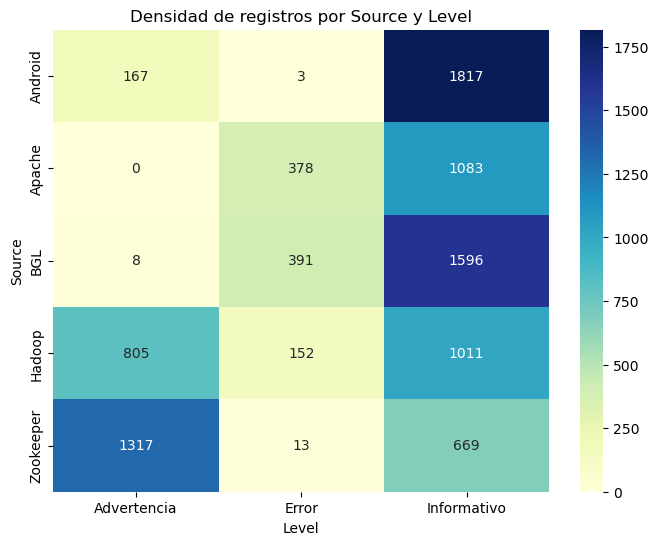

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una tabla dinámica
pivot_table = grouped.pivot(index='source', columns='Level', values='count').fillna(0)

# Gráfico de calor
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Densidad de registros por Source y Level')
plt.ylabel('Source')
plt.xlabel('Level')
plt.show()

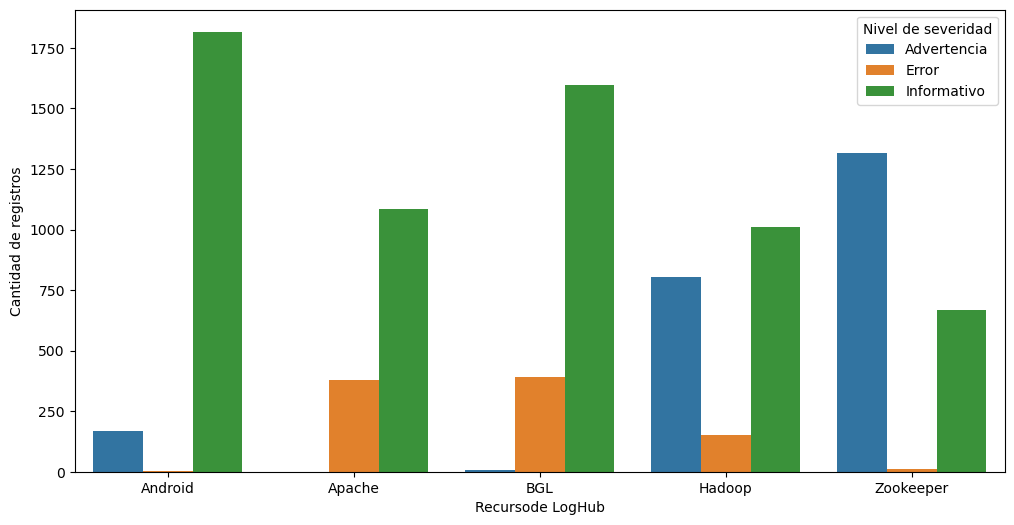

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='source', y='count', hue='Level')
plt.title('')
plt.ylabel('Cantidad de registros')
plt.xlabel('Recursode LogHub')
plt.legend(title='Nivel de severidad')
plt.show()

/tmp/ipykernel_18972/2436881859.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Source')


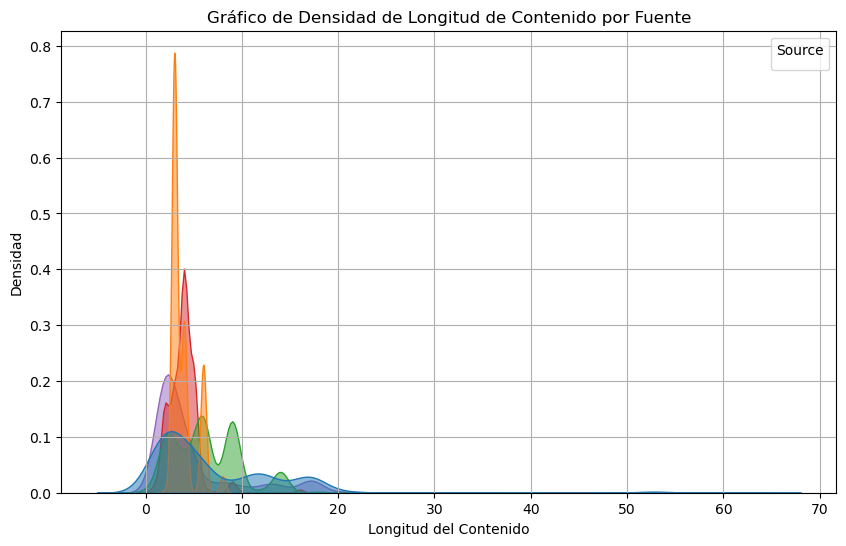

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar tu DataFrame (asegúrate de tener la columna 'content_length' como numérica)
# df = pd.read_csv('tus_datos.csv')  # Si estás cargando desde archivo

# Gráfico de densidad de content_length por 'source'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='content_length', hue='source', fill=True, common_norm=False, alpha=0.5)
plt.title('Gráfico de Densidad de Longitud de Contenido por Fuente')
plt.xlabel('Longitud del Contenido')
plt.ylabel('Densidad')
plt.legend(title='Source')
plt.grid(True)
plt.show()

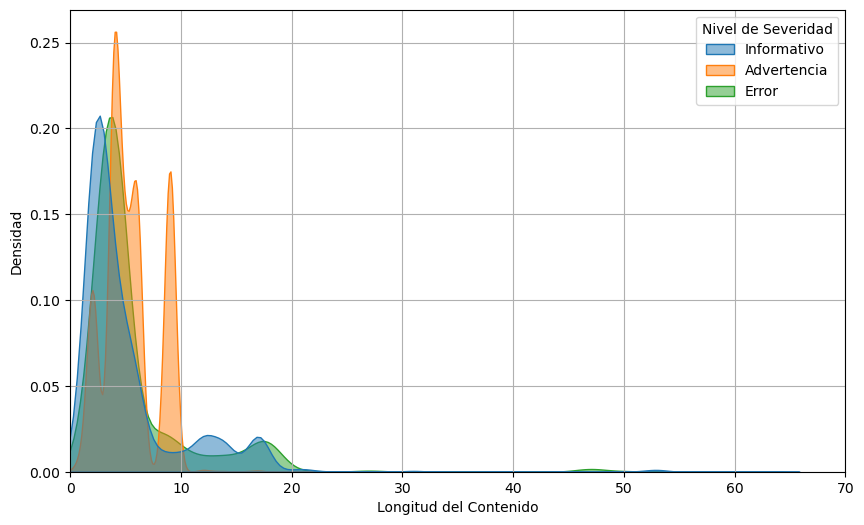

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Renombrar columna (opcional, pero correcto)
df["Nivel de Severidad"] = df["Level"]

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='content_length', hue='Nivel de Severidad', fill=True, common_norm=False, alpha=0.5)
plt.xlabel('Longitud del Contenido')
plt.ylabel('Densidad')
plt.xlim(0,70)
plt.title('')
#plt.legend(title='Nivel de Severidad')
plt.grid(True)
plt.show()

In [27]:
# Promediar content_length por Level
grouped = df.groupby('Level')['content_length'].mean().reset_index(name='promedio_content_length')
print(grouped)

         Level  promedio_content_length
0  Advertencia                 5.385721
1        Error                 5.741729
2  Informativo                 5.284650


In [28]:
# Promediar content_length por Level
grouped = df.groupby('Level')['content_length'].max().reset_index(name='promedio_content_length')
print(grouped)

         Level  promedio_content_length
0  Advertencia                       22
1        Error                       50
2  Informativo                       63


In [29]:
# Promediar content_length por Level
grouped = df.groupby('Level')['content_length'].median().reset_index(name='promedio_content_length')
print(grouped)

         Level  promedio_content_length
0  Advertencia                      5.0
1        Error                      4.0
2  Informativo                      3.0
